In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy
from sklearn.metrics import pairwise_distances
!pip install Levenshtein
from Levenshtein import distance as levenshtein_distance
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 9.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
# Load your data
alpha_chain_data = pd.read_csv('/content/drive/MyDrive/cdr3_alpha_df.csv')
beta_chain_data = pd.read_csv('/content/drive/MyDrive/cdr3_beta_df.csv')
alpha_beta_chain = pd.read_csv('/content/drive/MyDrive/cdr3_alpha_beta_df.csv')

In [31]:
# Function to calculate the pairwise Levenshtein distance matrix
def levenshtein_distance_matrix(sequences):
    length = len(sequences)
    dist_matrix = np.zeros((length, length))
    for i in range(length):
        for j in range(i + 1, length):  # Use symmetry to save computation
            dist = levenshtein_distance(sequences[i], sequences[j])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix

In [32]:
# 定义保存函数，使用 DataFrame 来保存 CSV
def save_distance_matrix_to_csv(distance_matrix, filename):
    df = pd.DataFrame(distance_matrix)
    df.to_csv(filename, index=True, header=True)  # 不保存行列的索引

In [43]:
# Extract CDR3 sequences
alpha_homoSapiens_sequences = alpha_chain_data.loc[alpha_chain_data['species'] == 'HomoSapiens', ['cdr3_a_aa', 'v_a_gene', 'j_a_gene']].values.tolist()
alpha_musMusculus_sequences = alpha_chain_data.loc[alpha_chain_data['species'] == 'MusMusculus', ['cdr3_a_aa', 'v_a_gene', 'j_a_gene']].values.tolist()

beta_homoSapiens_sequences = beta_chain_data.loc[beta_chain_data['species'] == 'HomoSapiens', ['cdr3_b_aa', 'v_b_gene', 'j_b_gene']].values.tolist()
beta_musMusculus_sequences = beta_chain_data.loc[beta_chain_data['species'] == 'MusMusculus', ['cdr3_b_aa', 'v_b_gene', 'j_b_gene']].values.tolist()

alpha_beta_homoSapiens_sequences = [a + b for a, b in zip(
    alpha_chain_data.loc[alpha_chain_data['species'] == 'HomoSapiens', ['cdr3_a_aa', 'v_a_gene', 'j_a_gene']].values.tolist(),
    beta_chain_data.loc[beta_chain_data['species'] == 'HomoSapiens', ['cdr3_b_aa', 'v_b_gene', 'j_b_gene']].values.tolist())]

alpha_beta_musMusculus_sequences = [a + b for a, b in zip(
    alpha_chain_data.loc[alpha_chain_data['species'] == 'MusMusculus', ['cdr3_a_aa',  'v_a_gene', 'j_a_gene']].values.tolist(),
    beta_chain_data.loc[beta_chain_data['species'] == 'MusMusculus', ['cdr3_b_aa', 'v_b_gene', 'j_b_gene']].values.tolist())]


alpha_homoSapiens_distance_matrix = levenshtein_distance_matrix(alpha_homoSapiens_sequences)
alpha_musMusculus_distance_matrix = levenshtein_distance_matrix(alpha_musMusculus_sequences)
beta_homoSapiens_distance_matrix = levenshtein_distance_matrix(beta_homoSapiens_sequences)
beta_musMusculus_distance_matrix = levenshtein_distance_matrix(beta_musMusculus_sequences)
alpha_beta_homoSapiens_distance_matrix = levenshtein_distance_matrix(alpha_beta_homoSapiens_sequences)
alpha_beta_musMusculus_distance_matrix = levenshtein_distance_matrix(alpha_beta_musMusculus_sequences)

# 保存矩阵到 CSV
save_distance_matrix_to_csv(alpha_homoSapiens_distance_matrix, "/content/drive/MyDrive/alpha_homoSapiens_distance_matrix.csv")
save_distance_matrix_to_csv(alpha_musMusculus_distance_matrix, "/content/drive/MyDrive/alpha_musMusculus_distance_matrix.csv")
save_distance_matrix_to_csv(beta_homoSapiens_distance_matrix, "/content/drive/MyDrive/beta_homoSapiens_distance_matrix.csv")
save_distance_matrix_to_csv(beta_musMusculus_distance_matrix, "/content/drive/MyDrive/beta_musMusculus_distance_matrix.csv")
save_distance_matrix_to_csv(alpha_beta_homoSapiens_distance_matrix, "/content/drive/MyDrive/alpha_beta_homoSapiens_distance_matrix.csv")
save_distance_matrix_to_csv(alpha_beta_musMusculus_distance_matrix, "/content/drive/MyDrive/alpha_beta_musMusculus_distance_matrix.csv")

In [ ]:
# Compute the distance matrices
# alpha_cdr3_sequences = alpha_cdr3_homoSapiens_sequences + alpha_cdr3_musMusculus_sequences
# beta_cdr3_sequences = beta_cdr3_homoSapiens_sequences + beta_cdr3_musMusculus_sequences
# cdr3_alpha_beta_sequences = cdr3_alpha_beta_homoSapiens_sequences + cdr3_alpha_beta_musMusculus_sequences

# alpha_distance_matrix = levenshtein_distance_matrix(alpha_cdr3_sequences)
# beta_distance_matrix = levenshtein_distance_matrix(beta_cdr3_sequences)
# cdr3_alpha_beta_distance_matrix = levenshtein_distance_matrix(cdr3_alpha_beta_sequences)

# # Save the matrices to CSV files
# save_distance_matrix_to_csv(alpha_distance_matrix.csv, "/content/drive/MyDrive/alpha_distance_matrix.csv")
# save_distance_matrix_to_csv(beta_distance_matrix.csv, "/content/drive/MyDrive/alpha_cdr3_homoSapiens_distance_matrix.csv")
# save_distance_matrix_to_csv(alpha_cdr3_homoSapiens_distance_matrix, "/content/drive/MyDrive/alpha_cdr3_homoSapiens_distance_matrix.csv")
# np.savetxt("/content/drive/MyDrive/beta_distance_matrix.csv", beta_distance_matrix, delimiter=",")
# np.savetxt("/content/drive/MyDrive/cdr3_alpha_beta_distance_matrix.csv", cdr3_alpha_beta_distance_matrix, delimiter=",")



In [44]:
# Load the distance matrices from CSV files
# alpha_distance_matrix = pd.read_csv("alpha_distance_matrix.csv", delimiter=",")
# beta_distance_matrix = pd.read_csv("beta_distance_matrix.csv", delimiter=",")
# cdr3_alpha_beta_distance_matrix = pd.read_csv("cdr3_alpha_beta_distance_matrix.csv", delimiter=",")

alpha_homoSapiens_distance_matrix = pd.read_csv("/content/drive/MyDrive/alpha_homoSapiens_distance_matrix.csv")
alpha_musMusculus_distance_matrix = pd.read_csv("/content/drive/MyDrive/alpha_musMusculus_distance_matrix.csv")
beta_homoSapiens_distance_matrix = pd.read_csv("/content/drive/MyDrive/beta_homoSapiens_distance_matrix.csv")
beta_musMusculus_distance_matrix = pd.read_csv("/content/drive/MyDrive/beta_musMusculus_distance_matrix.csv")
alpha_beta_homoSapiens_distance_matrix = pd.read_csv("/content/drive/MyDrive/alpha_beta_homoSapiens_distance_matrix.csv")
alpha_beta_musMusculus_distance_matrix = pd.read_csv("/content/drive/MyDrive/alpha_beta_musMusculus_distance_matrix.csv")


In [48]:
def load_distance_matrix(filename):
    return pd.read_csv(filename, index_col=0)

# load the distance matrices
# distance_matrix_alpha = load_distance_matrix('alpha_distance_matrix.csv')
# distance_matrix_beta = load_distance_matrix('beta_distance_matrix.csv')
# distance_matrix_alpha_beta = load_distance_matrix('cdr3_alpha_beta_distance_matrix.csv')

alpha_homoSapiens_distance_matrix = load_distance_matrix('/content/drive/MyDrive/alpha_homoSapiens_distance_matrix.csv')
alpha_musMusculus_distance_matrix = load_distance_matrix('/content/drive/MyDrive/alpha_musMusculus_distance_matrix.csv')
beta_homoSapiens_distance_matrix = load_distance_matrix('/content/drive/MyDrive/beta_homoSapiens_distance_matrix.csv')
beta_musMusculus_distance_matrix = load_distance_matrix('/content/drive/MyDrive/beta_musMusculus_distance_matrix.csv')
alpha_beta_homoSapiens_distance_matrix = load_distance_matrix('/content/drive/MyDrive/alpha_beta_homoSapiens_distance_matrix.csv')
alpha_beta_musMusculus_distance_matrix = load_distance_matrix('/content/drive/MyDrive/alpha_beta_musMusculus_distance_matrix.csv')

In [62]:
distance_matrices = [
    (alpha_homoSapiens_distance_matrix, 'alpha_homoSapiens_distance_matrix'),
    (alpha_musMusculus_distance_matrix, 'alpha_musMusculus_distance_matrix'),
    (beta_homoSapiens_distance_matrix, 'beta_homoSapiens_distance_matrix.csv'),
    (beta_musMusculus_distance_matrix, 'beta_musMusculus_distance_matrix.csv'),
    (alpha_beta_homoSapiens_distance_matrix, 'alpha_beta_homoSapiens_distance_matrix'),
    (alpha_beta_musMusculus_distance_matrix, 'alpha_beta_musMusculus_distance_matrix')
    ]

In [66]:
# transform the distance matrix into a condensed distance matrix
# perform hierarchical clustering
for distance_matrix, label in distance_matrices:
    # 转换距离矩阵为压缩格式
    condensed_dist_matrix = squareform(distance_matrix)

    # 执行层次聚类
    linkage_matrix = linkage(condensed_dist_matrix, method='ward')

    # 创建一个DataFrame来保存linkage矩阵
    linkage_df = pd.DataFrame(linkage_matrix, columns=['Cluster1', 'Cluster2', 'Distance', 'New Cluster Size'])

    # 保存DataFrame为CSV文件
    linkage_df.to_csv(f'/content/drive/MyDrive/linkage_matrix_{label}.csv', index=True)

In [ ]:
def plot_dendrogram(model, **kwargs):
    # 创建链接矩阵并绘制树状图
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # 叶节点
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # 绘制对应的树状图
    dendrogram(linkage_matrix, **kwargs)


In [69]:
# 加载距离矩阵
for matrix, label in distance_matrices:
    # 创建聚类器，这里使用预先计算的距离
    clustering = AgglomerativeClustering(n_clusters=5, affinity='precomputed', linkage='complete')
    # 执行聚类
    clustering.fit(matrix)
    # 创建 DataFrame 来保存聚类结果
    labels = pd.DataFrame(clustering.labels_, columns=['ClusterLabel'])
    # 保存聚类结果
    labels.to_csv(f'/content/drive/MyDrive/{label}_labels.csv', index=True)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Calculating silhouette scores for alpha_homoSapiens_distance_matrix
Number of Clusters: 2, Silhouette Score: 0.016252551404704052


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 3, Silhouette Score: 0.008808727622275117
Number of Clusters: 4, Silhouette Score: 0.005049338113279621


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 5, Silhouette Score: 0.0026788640479539823
Number of Clusters: 6, Silhouette Score: 0.004612742209069302


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 7, Silhouette Score: 0.00444492035521603
Number of Clusters: 8, Silhouette Score: 0.008933962447076962


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 9, Silhouette Score: 0.006405959798137471
Number of Clusters: 10, Silhouette Score: 0.008905082473314077


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


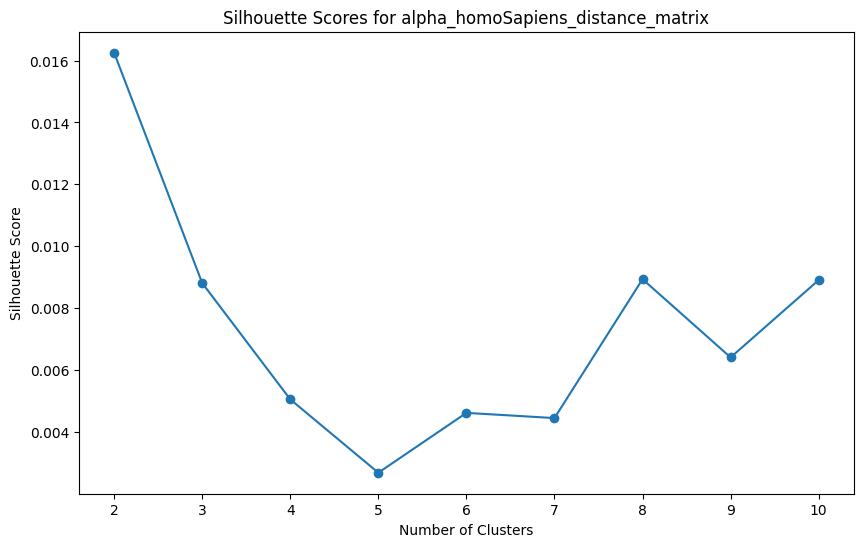

Calculating silhouette scores for alpha_musMusculus_distance_matrix
Number of Clusters: 2, Silhouette Score: 0.03206506647925447
Number of Clusters: 3, Silhouette Score: 0.024978806260228935
Number of Clusters: 4, Silhouette Score: 0.02181935093200215
Number of Clusters: 5, Silhouette Score: 0.02018831128792593


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Number of Clusters: 6, Silhouette Score: 0.017420472694646413
Number of Clusters: 7, Silhouette Score: 0.014928645261007303
Number of Clusters: 8, Silhouette Score: 0.019944877272095627
Number of Clusters: 9, Silhouette Score: 0.03776500409937404
Number of Clusters: 10, Silhouette Score: 0.035398327430029526


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


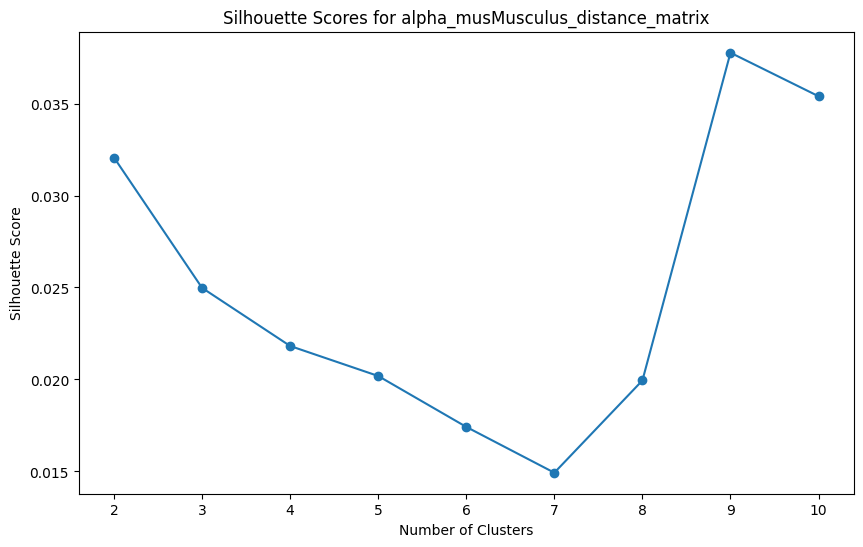

Calculating silhouette scores for beta_homoSapiens_distance_matrix.csv
Number of Clusters: 2, Silhouette Score: 0.059352849629680134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 3, Silhouette Score: 0.09190567453148785
Number of Clusters: 4, Silhouette Score: 0.10310910199424343


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 5, Silhouette Score: 0.13357137253546844
Number of Clusters: 6, Silhouette Score: 0.17100408918535503


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 7, Silhouette Score: 0.1795827534610149
Number of Clusters: 8, Silhouette Score: 0.2081903870518645


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 9, Silhouette Score: 0.2512085739459658
Number of Clusters: 10, Silhouette Score: 0.24036853179843556


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


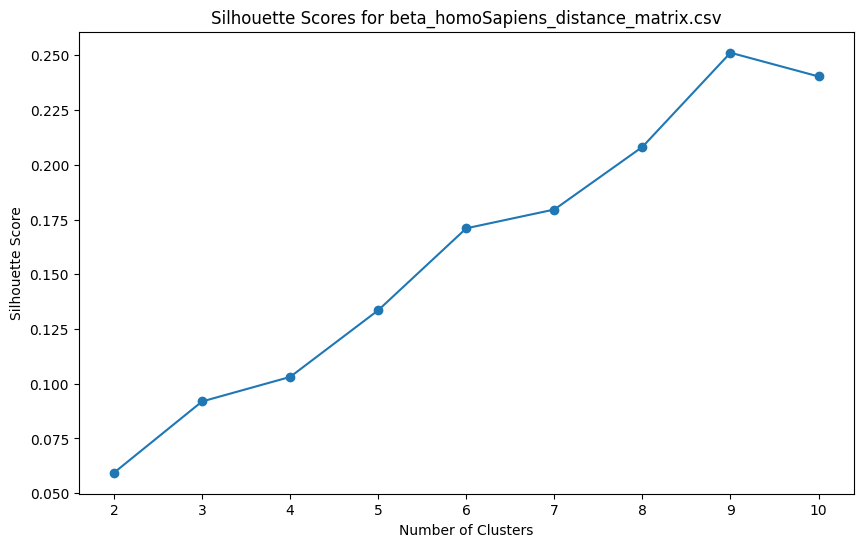

Calculating silhouette scores for beta_musMusculus_distance_matrix.csv
Number of Clusters: 2, Silhouette Score: 0.06064789977860064
Number of Clusters: 3, Silhouette Score: 0.05066695972740749
Number of Clusters: 4, Silhouette Score: 0.09070762584561821
Number of Clusters: 5, Silhouette Score: 0.1362884461002419


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Number of Clusters: 6, Silhouette Score: 0.14048216339599776
Number of Clusters: 7, Silhouette Score: 0.16660858302902182
Number of Clusters: 8, Silhouette Score: 0.18159572336643534
Number of Clusters: 9, Silhouette Score: 0.19289311569639836
Number of Clusters: 10, Silhouette Score: 0.20540403436329174


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


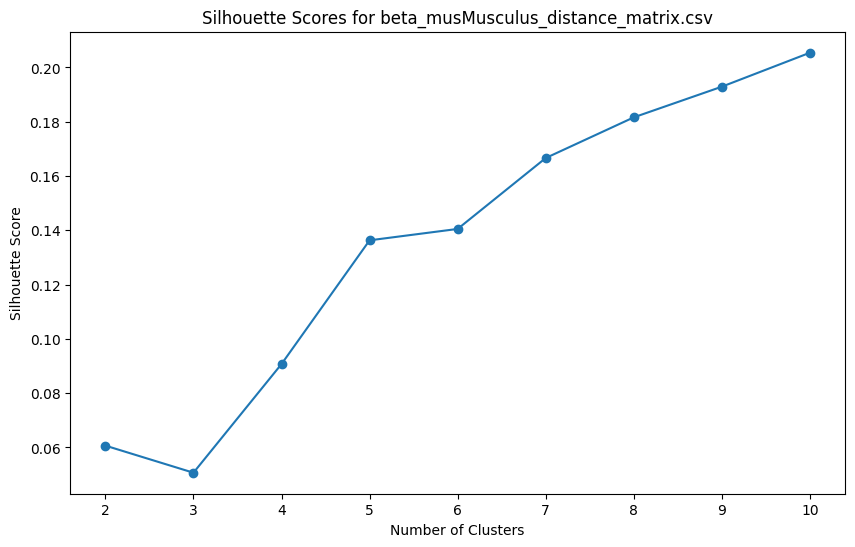

Calculating silhouette scores for alpha_beta_homoSapiens_distance_matrix
Number of Clusters: 2, Silhouette Score: 0.007052802043857037


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 3, Silhouette Score: -0.005809519639453638
Number of Clusters: 4, Silhouette Score: -0.009968828584322943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 5, Silhouette Score: -0.014343927573924076
Number of Clusters: 6, Silhouette Score: -0.012208241487176277


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 7, Silhouette Score: -0.011000608855405861
Number of Clusters: 8, Silhouette Score: -0.01595521564001978


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Number of Clusters: 9, Silhouette Score: -0.015550809884602492
Number of Clusters: 10, Silhouette Score: -0.016161422392828795


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


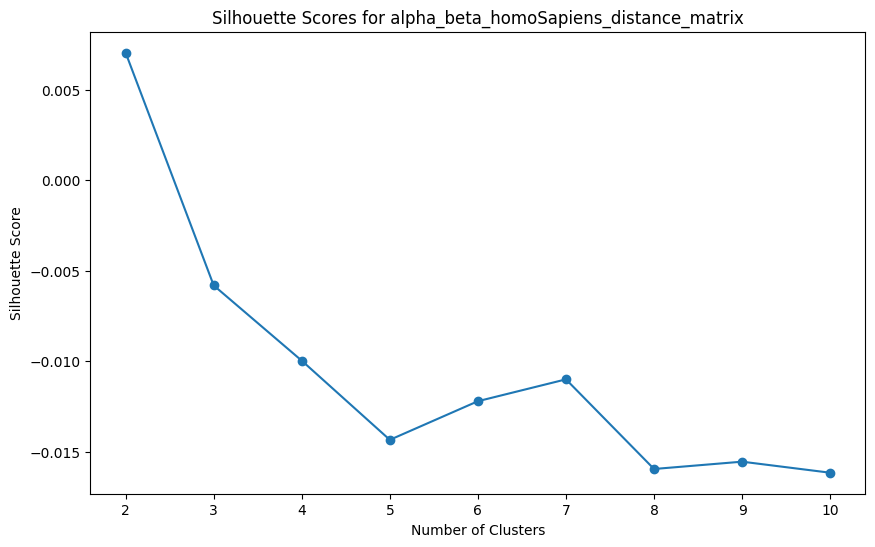

Calculating silhouette scores for alpha_beta_musMusculus_distance_matrix
Number of Clusters: 2, Silhouette Score: 0.03168139323053228
Number of Clusters: 3, Silhouette Score: -0.006884303362413256
Number of Clusters: 4, Silhouette Score: -0.012892771596136412
Number of Clusters: 5, Silhouette Score: -0.004326858510856699


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

Number of Clusters: 6, Silhouette Score: -0.01004064647668277
Number of Clusters: 7, Silhouette Score: -0.012798508003479045
Number of Clusters: 8, Silhouette Score: -0.019556648720262297
Number of Clusters: 9, Silhouette Score: -0.021622272936197215
Number of Clusters: 10, Silhouette Score: -0.021292270657267954


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


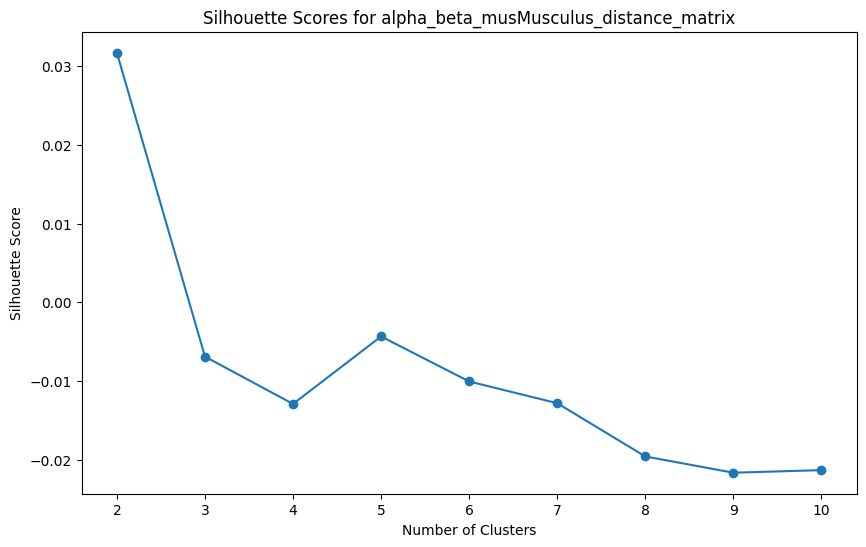

In [60]:
data = distance_matrices

# Loop over each distance matrix and calculate silhouette scores for a range of cluster numbers
for matrix, label in distance_matrices:
    print(f"Calculating silhouette scores for {label}")
    silhouette_scores = []
    cluster_range = range(2, 11)

    # Iterate through the range of cluster numbers
    for n_clusters in cluster_range:
        # Create a clustering instance with the specified number of clusters
        clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')

        # Fit the clustering instance to the data and predict the labels
        labels = clustering.fit_predict(matrix)

        # Calculate the silhouette score for the current number of clusters
        score = silhouette_score(matrix, labels, metric='precomputed')
        silhouette_scores.append(score)
        print(f'Number of Clusters: {n_clusters}, Silhouette Score: {score}')

    # Plot the elbow graph for the current distance matrix
    plt.figure(figsize=(10, 6))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title(f'Silhouette Scores for {label}')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()